In [1]:
!pip3 install backtesting

In [2]:
!pip install plotly

In [3]:
!pip install pandas_ta

In [4]:
#Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
from PIL import Image
import matplotlib.image as mpimg
import plotly
import plotly.graph_objects as go

In [5]:
!pip install pandas matplotlib

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Load csv data into a DataFrame
file_path = 'C:/Users/SWATHI/Downloads/AxisBank-Futures-Exp28Mar2024.csv'
data = pd.read_csv(file_path)
data

,close,datetime,exchange_code,expiry_date,high,low,open,open_interest,product_type,stock_code,volume
0,1086.10,2024-03-01 09:15:00,NFO,28-MAR-2024,1086.10,1082.00,1082.05,50979375,Futures,AXIBAN,153125
1,1087.25,2024-03-01 09:16:00,NFO,28-MAR-2024,1088.15,1085.25,1085.55,50979375,Futures,AXIBAN,210625
2,1086.20,2024-03-01 09:17:00,NFO,28-MAR-2024,1087.55,1086.15,1087.55,50979375,Futures,AXIBAN,61875
3,1087.25,2024-03-01 09:18:00,NFO,28-MAR-2024,1088.25,1086.95,1087.10,50995625,Futures,AXIBAN,60625
4,1086.50,2024-03-01 09:19:00,NFO,28-MAR-2024,1087.55,1086.50,1087.25,50995625,Futures,AXIBAN,48125
...,...,...,...,...,...,...,...,...,...,...,...
6083,1050.80,2024-03-28 13:56:00,NFO,28-MAR-2024,1051.30,1050.65,1050.80,11893750,Futures,AXIBAN,8125
6084,1050.40,2024-03-28 13:57:00,NFO,28-MAR-2024,1051.40,1050.40,1050.80,11893750,Futures,AXIBAN,8750
6085,1050.15,2024-03-28 13:58:00,NFO,28-MAR-2024,1050.70,1050.15,1050.40,11900625,Futures,AXIBAN,36250
6086,1051.05,2024-03-28 13:59:00,NFO,28-MAR-2024,1051.05,1050.15,1050.15,11900625,Futures,AXIBAN,25625


In [8]:
print(data.head())

     close             datetime exchange_code  expiry_date     high      low  \
0  1086.10  2024-03-01 09:15:00           NFO  28-MAR-2024  1086.10  1082.00   
1  1087.25  2024-03-01 09:16:00           NFO  28-MAR-2024  1088.15  1085.25   
2  1086.20  2024-03-01 09:17:00           NFO  28-MAR-2024  1087.55  1086.15   
3  1087.25  2024-03-01 09:18:00           NFO  28-MAR-2024  1088.25  1086.95   
4  1086.50  2024-03-01 09:19:00           NFO  28-MAR-2024  1087.55  1086.50   

      open  open_interest product_type stock_code  volume  
0  1082.05       50979375      Futures     AXIBAN  153125  
1  1085.55       50979375      Futures     AXIBAN  210625  
2  1087.55       50979375      Futures     AXIBAN   61875  
3  1087.10       50995625      Futures     AXIBAN   60625  
4  1087.25       50995625      Futures     AXIBAN   48125  


In [9]:
sel_cols = ['datetime', 'close', 'open', 'high', 'volume', 'low']
data = data[sel_cols]
data.head()

,datetime,close,open,high,volume,low
0,2024-03-01 09:15:00,1086.10,1082.05,1086.10,153125,1082.00
1,2024-03-01 09:16:00,1087.25,1085.55,1088.15,210625,1085.25
2,2024-03-01 09:17:00,1086.20,1087.55,1087.55,61875,1086.15
3,2024-03-01 09:18:00,1087.25,1087.10,1088.25,60625,1086.95
4,2024-03-01 09:19:00,1086.50,1087.25,1087.55,48125,1086.50


In [25]:
# Convert 'datetime' to a pandas datetime type
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.loc[:, :]
data = data.sort_values(by='datetime')
data.head()

,datetime,close,open,high,volume,low,SMA_50,SMA_200,Signal,Position,Strategy_Returns,Cumulative_Returns
0,2024-03-01 09:15:00,1086.10,1082.05,1086.10,153125,1082.00,1086.100000,1086.100000,0,NaN,NaN,NaN
1,2024-03-01 09:16:00,1087.25,1085.55,1088.15,210625,1085.25,1086.675000,1086.675000,0,0.0,0.0,1.0
2,2024-03-01 09:17:00,1086.20,1087.55,1087.55,61875,1086.15,1086.516667,1086.516667,0,0.0,-0.0,1.0
3,2024-03-01 09:18:00,1087.25,1087.10,1088.25,60625,1086.95,1086.700000,1086.700000,0,0.0,0.0,1.0
4,2024-03-01 09:19:00,1086.50,1087.25,1087.55,48125,1086.50,1086.660000,1086.660000,0,0.0,-0.0,1.0


In [11]:
# Defining the short-term and long-term moving averages
short_window = 50  
long_window = 200  

In [12]:
# Calculate the moving averages
data['SMA_50'] = data['close'].rolling(window=short_window, min_periods=1).mean()
data['SMA_50']

0       1086.100000
1       1086.675000
2       1086.516667
3       1086.700000
4       1086.660000
           ...     
6083    1051.924000
6084    1051.877000
6085    1051.811000
6086    1051.764000
6087    1051.724000
Name: SMA_50, Length: 6088, dtype: float64

In [13]:
data['SMA_200'] = data['close'].rolling(window=long_window, min_periods=1).mean()
data['SMA_200']

0       1086.100000
1       1086.675000
2       1086.516667
3       1086.700000
4       1086.660000
           ...     
6083    1052.686500
6084    1052.667750
6085    1052.643500
6086    1052.620500
6087    1052.590250
Name: SMA_200, Length: 6088, dtype: float64

In [14]:
# Create a signal for crossovers
data['Signal'] = 0  # No initial signal
data['Signal']

0       0
1       0
2       0
3       0
4       0
       ..
6083    0
6084    0
6085    0
6086    0
6087    0
Name: Signal, Length: 6088, dtype: int64

In [15]:
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1  # Buy signal
data.loc[data['SMA_50'] < data['SMA_200'], 'Signal'] = -1  # Sell signal

In [16]:
# Shift the signal to simulate trades on the next day
data['Position'] = data['Signal'].shift(1)
data['Position']

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6083   -1.0
6084   -1.0
6085   -1.0
6086   -1.0
6087   -1.0
Name: Position, Length: 6088, dtype: float64

In [17]:
# Calculate daily returns for the backtest
data['Position'] = data['Signal'].shift(1)
data['Strategy_Returns'] = data['Position'] * data['close'].pct_change()
data['Strategy_Returns']

0            NaN
1       0.000000
2      -0.000000
3       0.000000
4      -0.000000
          ...   
6083   -0.000000
6084    0.000381
6085    0.000238
6086   -0.000857
6087   -0.000095
Name: Strategy_Returns, Length: 6088, dtype: float64

In [18]:
data['Strategy_Returns']

0            NaN
1       0.000000
2      -0.000000
3       0.000000
4      -0.000000
          ...   
6083   -0.000000
6084    0.000381
6085    0.000238
6086   -0.000857
6087   -0.000095
Name: Strategy_Returns, Length: 6088, dtype: float64

In [19]:
# Calculate cumulative returns to evaluate the strategy's performance
data['Cumulative_Returns'] = (1 + data['Strategy_Returns']).cumprod()
data['Cumulative_Returns']

0            NaN
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
6083    0.908328
6084    0.908673
6085    0.908890
6086    0.908111
6087    0.908024
Name: Cumulative_Returns, Length: 6088, dtype: float64

In [20]:
# Plot the moving averages and crossover signals

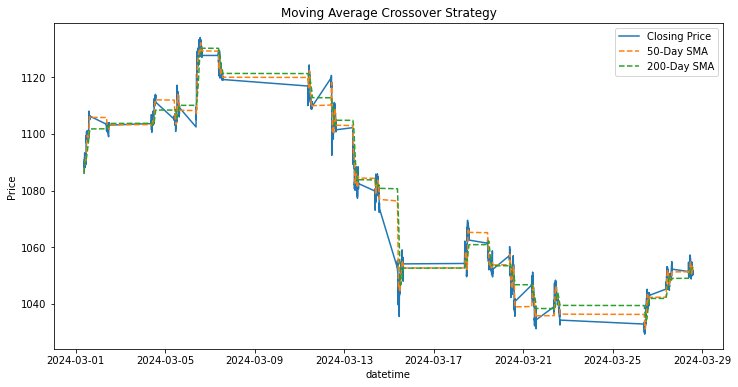

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['close'], label='Closing Price')
plt.plot(data['datetime'], data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.plot(data['datetime'], data['SMA_200'], label='200-Day SMA', linestyle='--')
plt.title("Moving Average Crossover Strategy")
plt.xlabel("datetime")
plt.ylabel("Price")
plt.legend()
plt.show()

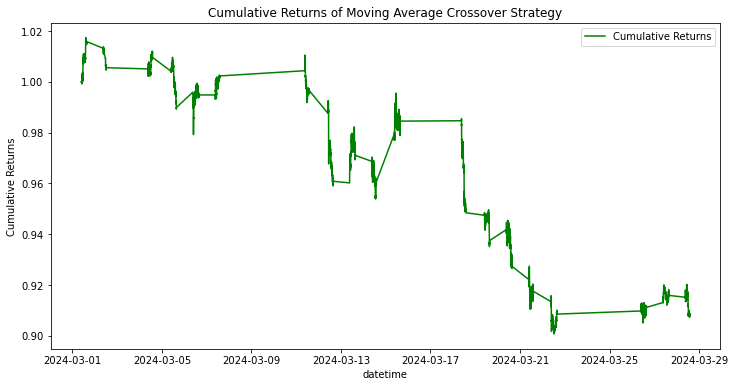

In [22]:
# Plot the cumulative returns for the strategy
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Cumulative_Returns'], label='Cumulative Returns', color='green')
plt.title("Cumulative Returns of Moving Average Crossover Strategy")
plt.xlabel("datetime")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


     close             datetime exchange_code  expiry_date     high      low  \
0  1086.10  2024-03-01 09:15:00           NFO  28-MAR-2024  1086.10  1082.00   
1  1087.25  2024-03-01 09:16:00           NFO  28-MAR-2024  1088.15  1085.25   
2  1086.20  2024-03-01 09:17:00           NFO  28-MAR-2024  1087.55  1086.15   
3  1087.25  2024-03-01 09:18:00           NFO  28-MAR-2024  1088.25  1086.95   
4  1086.50  2024-03-01 09:19:00           NFO  28-MAR-2024  1087.55  1086.50   

      open  open_interest product_type stock_code  volume  
0  1082.05       50979375      Futures     AXIBAN  153125  
1  1085.55       50979375      Futures     AXIBAN  210625  
2  1087.55       50979375      Futures     AXIBAN   61875  
3  1087.10       50995625      Futures     AXIBAN   60625  
4  1087.25       50995625      Futures     AXIBAN   48125  


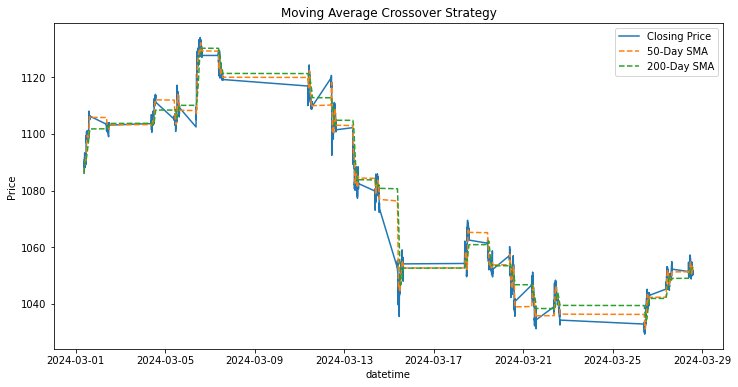

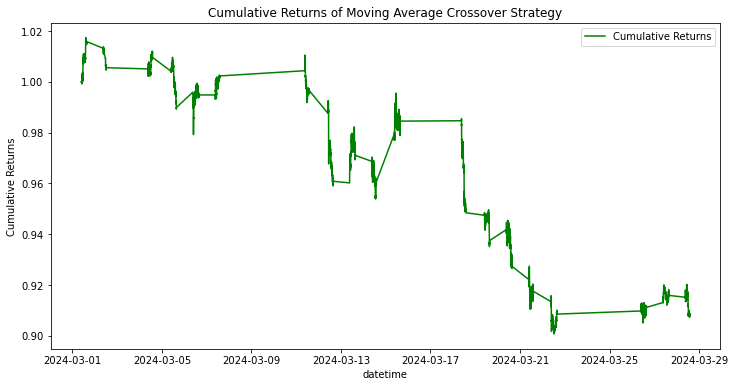

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV df_axis into a dataframe
file_path = 'C:/Users/SWATHI/Downloads/AxisBank-Futures-Exp28Mar2024.csv'
df_axis = pd.read_csv(file_path)

print(df_axis.head())

# Converting into pandas dateime type
df_axis['datetime'] = pd.to_datetime(df_axis['datetime'])

# Sorting by datetime
df_axis = df_axis.sort_values(by='datetime')

# Define the 50-day short-term and 200-day long-term moving averages
short_window = 50  
long_window = 200  

# Calculate the moving averages
df_axis['SMA_50'] = df_axis['close'].rolling(window=short_window, min_periods=1).mean()
df_axis['SMA_200'] = df_axis['close'].rolling(window=long_window, min_periods=1).mean()

# Create a signal for crossovers
df_axis['Signal'] = 0  # No initial signal
df_axis.loc[df_axis['SMA_50'] > df_axis['SMA_200'], 'Signal'] = 1  # Buy signal
df_axis.loc[df_axis['SMA_50'] < df_axis['SMA_200'], 'Signal'] = -1  # Sell signal

# Shift the signal to simulate trades on the next day
df_axis['Position'] = df_axis['Signal'].shift(1)
df_axis['Position'] = df_axis['Signal'].shift(1)

# Calculate daily returns for the backtest
df_axis['Strategy_Returns'] = df_axis['Position'] * df_axis['close'].pct_change()

# Calculate cumulative returns to evaluate the strategy's performance
df_axis['Cumulative_Returns'] = (1 + df_axis['Strategy_Returns']).cumprod()

# Plot the moving averages and crossover signals
plt.figure(figsize=(12, 6))
plt.plot(df_axis['datetime'], df_axis['close'], label='Closing Price')
plt.plot(df_axis['datetime'], df_axis['SMA_50'], label='50-Day SMA', linestyle='--')
plt.plot(df_axis['datetime'], df_axis['SMA_200'], label='200-Day SMA', linestyle='--')
plt.title("Moving Average Crossover Strategy")
plt.xlabel("datetime")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot the cumulative returns for the strategy
plt.figure(figsize=(12, 6))
plt.plot(df_axis['datetime'], df_axis['Cumulative_Returns'], label='Cumulative Returns', color='green')
plt.title("Cumulative Returns of Moving Average Crossover Strategy")
plt.xlabel("datetime")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()
